# Project 3 : Part 1

### Luis Garduno

## 1. About CIFAR-10

The CIFAR-10 dataset is a dataset of gathered from the [80 million tiny images](http://people.csail.mit.edu/torralba/tinyimages/) dataset, containing a combination of images of animals and transportation objects. Within the dataset there are 6 animal & 4 transportation object classes:

- **Animals :** bird, cat, deer, dog, frog, horse
- **Transportation Objects :** airplane, automobile, ship, truck

----------------------

Dataset/s:
- [CIFAR-10 (python version)](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz)
- [CIFAR-10 (binary version)](https://www.cs.toronto.edu/~kriz/cifar-10-binary.tar.gz)
    
-----------------------

## 2. Data Preparation

###  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.1 Loading Data & Adjustments

In [1]:
import glob
import pickle
import numpy as np
import pandas as pd

from PIL import Image
from tkinter import Tcl
from sklearn import preprocessing

# Directory - Python dataset, Binary dataset, & file name of batch files (python)
PY_DATA_PATH = './data/cifar-10-python/cifar-10-batches-py'
BIN_DATA_PATH = './data/cifar-10-binary/cifar-10-batches-bin/data_batch_1.bin'
BATCHES_PATH = ['/data_batch_1', '/data_batch_2', '/data_batch_3', '/data_batch_4', '/data_batch_5', '/test_batch']

le = preprocessing.LabelEncoder()

# Load list of labels/classes (once dataset file has been extracted)

# -------- Method 1 -------------------------------------
#with open(BIN_DATA_PATH + '/batches.meta.txt', 'r') as f:
#    class_names = [line.rstrip() for line in f]

# -------- Method 2 -------------------------------------
with open(PY_DATA_PATH + '/batches.meta', 'rb') as fo:
    batches_meta = pickle.load(fo)
    class_names = batches_meta['label_names']
    
print("=========== Classes ===========")
for i in range(len(class_names)): print(i,":", class_names[i])
print("\n# of Cases Per Batch:", batches_meta['num_cases_per_batch'])
print("# Channel Values (Size):", batches_meta['num_vis'])

=========== Classes ===========
0 : airplane
1 : automobile
2 : bird
3 : cat
4 : deer
5 : dog
6 : frog
7 : horse
8 : ship
9 : truck

# of Cases Per Batch: 10000
# Channel Values (Size): 3072


In [2]:
from __future__ import print_function
from imageio import imsave
import os, sys, tarfile, errno, urllib

import matplotlib.pyplot as plt
%matplotlib inline

# Image shape - h : HEIGHT, w : WIDTH, d : DEPTH
h = 32
w = 32
d = 3

# Size of a single image in bytes
SIZE = h * w * d

def read_single_image(image_file):
    img = np.fromfile(image_file, dtype=np.uint8, count=batches_meta['num_vis'])
    img = np.reshape(img, (d, h, w))
    img = np.transpose(img, (1, 2, 0))
    return img

def read_all_images(path_to_data):
    with open(path_to_data, 'rb') as f:
        all_data = np.fromfile(f, dtype=np.uint8)
        imgs = np.reshape(all_data, (-1, d, h, w))
        imgs = np.transpose(imgs, (1, 3, 2, 0))
        return imgs

def plot_image(img):
    plt.imshow(img)
    plt.show()
    
# unpickle : convert 'pickled' object into a dict
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# cleanDict : Converts dict(bytes) --> dict(uint8)
def cleanDict(batch_dict):
    for i in list(batch_dict.keys()): batch_dict[i.decode()] = batch_dict.pop(i)
    batch_dict['batch_label'] = batch_dict['batch_label'].decode()
    for i in range(len(list(batch_dict['filenames']))): batch_dict['filenames'][i] = batch_dict['filenames'][i].decode()
    return batch_dict

--> training batch 1 of 5


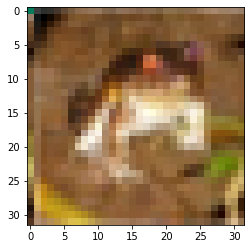

- Class: frog 
- Filename: leptodactylus_pentadactylus_s_000004.png


In [3]:
# Load each batch set into a dict w/ bytes type values,
# Convert: dict(bytes) --> dict(uint8)
batch_1 = cleanDict(unpickle(PY_DATA_PATH + BATCHES_PATH[0]))
batch_2 = cleanDict(unpickle(PY_DATA_PATH + BATCHES_PATH[1])) 
batch_3 = cleanDict(unpickle(PY_DATA_PATH + BATCHES_PATH[2]))
batch_4 = cleanDict(unpickle(PY_DATA_PATH + BATCHES_PATH[3]))
batch_5 = cleanDict(unpickle(PY_DATA_PATH + BATCHES_PATH[4]))

print("-->", batch_1['batch_label'], "\n")

# Print 1 image
with open(BIN_DATA_PATH) as f:
    image = read_single_image(f)
    plot_image(image)
print("- Class:", class_names[batch_1['labels'][0]], "\n- Filename:", batch_1['filenames'][0])